## Script to do some exploratory data analysis of AI accelerometer data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/j.wagg/DataScience/S2DS/EPRI/NewData2022/Logs')
from lablog_parser import *

In [2]:
df1 = pd.read_csv('20220726 eidb.csv')
df2 = pd.read_csv('20220726 eidb_2.csv')

In [3]:
anomfile = "/Users/j.wagg/DataScience/S2DS/EPRI/NewData2022/Logs/Lablog_processed.xlsx"
anom_list = read_anomalies(anomfile, sheets="all")

In [4]:
# what are the units of RealValue and severity ? What is 'Reason' ? 
print(df1.columns)

Index(['ID', 'Date_Time', 'PointIndex', 'Axis', 'Units', 'Severity',
       'RealValue', 'FileID', 'Reason', 'SyncID'],
      dtype='object')


In [5]:
df1['Date_Time'] =  pd.to_datetime(df1['Date_Time'])

In [6]:
df1['Severity'].describe()

count    26181.000000
mean         0.534129
std          1.072136
min         -1.000000
25%         -1.000000
50%          1.051617
75%          1.256156
max          3.798141
Name: Severity, dtype: float64

In [7]:
# add a new column to the data frame so that anomalies appear as binary 1 yes/0 no anomaly
# we can later use this for the Neural Network
df1['bin_anomaly'] = 0
df1['anom_type'] = 'None'

for index in df1.index:
    time = df1['Date_Time'][index]
    for i,j,k in anom_list:
        event_begin = pd.to_datetime(j)
        event_end = pd.to_datetime(k)
        #print(event_begin,event_end)
        if j != None and k != None:
            if (time >= event_begin and time < event_end): 
                df1.at[index,'bin_anomaly'] = 1
                df1.at[index,'anom_type'] = i

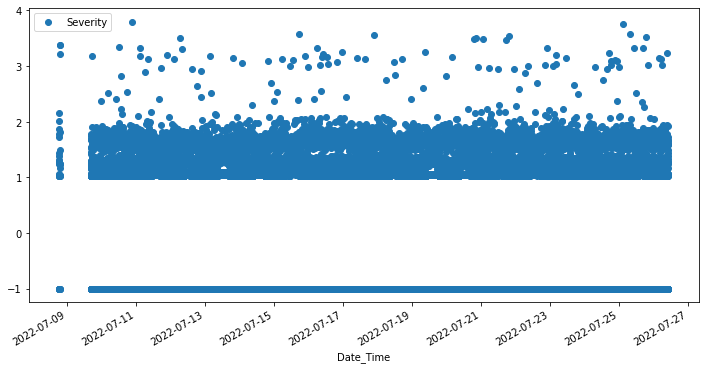

In [8]:
plt.rcParams['figure.figsize'] = [12, 6]
df1.plot(x='Date_Time', y='Severity',marker="o",linestyle='None') 
plt.show()

In [9]:
df1['RealValue'].describe()

count    26181.000000
mean         0.202381
std          0.321267
min          0.013308
25%          0.027174
50%          0.062444
75%          0.286895
max          6.232006
Name: RealValue, dtype: float64

/Users/j.wagg/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


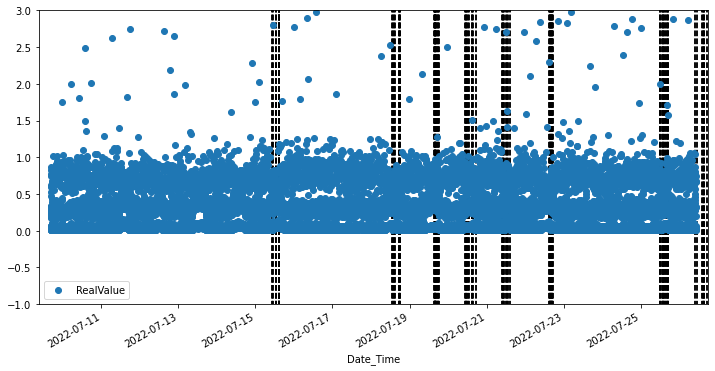

In [10]:
# see if there are any clear correlations betweem the anomalies and the changes to the accelerometer signal 
plt.rcParams['figure.figsize'] = [12, 6]
df1.plot(x='Date_Time', y='RealValue', marker="o",linestyle='None') 
plt.xlim(["2022-07-09 9:00", "2022-07-26 18:00"])
plt.ylim([-1, 3])

# vertical lines represent the start of a mechanical anomaly (change of flow rate, valve closure, etc)
for i,j,k in anom_list:
    event_begin = pd.to_datetime(j)
    event_end = pd.to_datetime(j)
    plt.vlines([event_begin, event_begin], -2, 8, colors='black', linestyles='dashed' )
plt.show()


In [11]:
# see if there is a significant difference in the RealValue values when an anomaly is occuring
df_noanom = df1.loc[df1['bin_anomaly'] == 0]
df_wanom = df1.loc[df1['bin_anomaly'] == 1]

print("Statistics of RealValue when no anomalies are present:")
print(df_noanom['RealValue'].describe())

print("Statistics of RealValue when anomalies -are- present:")
print(df_wanom['RealValue'].describe())

Statistics of RealValue when no anomalies are present:
count    25692.000000
mean         0.201809
std          0.321268
min          0.013308
25%          0.027045
50%          0.062396
75%          0.285795
max          6.232006
Name: RealValue, dtype: float64
Statistics of RealValue when anomalies -are- present:
count    489.000000
mean       0.232445
std        0.320112
min        0.013835
25%        0.035859
50%        0.068289
75%        0.364950
max        4.178678
Name: RealValue, dtype: float64


In [12]:
print(df2.keys)

<bound method NDFrame.keys of        MeasureID       tO1       tO2       tO3       tO4       tO5       tO6  \
0              5  0.399055  0.324378  0.246457  0.259769  0.374700  0.203400   
1              6  0.002113  0.002728  0.001924  0.001856  0.001720  0.002381   
2              8  0.071088  0.132803  0.140575  0.090189  0.127743  0.047915   
3              9  0.001167  0.001128  0.001048  0.000972  0.001470  0.001371   
4             11  0.382976  0.205003  0.131705  0.122977  0.117861  0.076009   
...          ...       ...       ...       ...       ...       ...       ...   
16651      26169  0.002126  0.002719  0.001847  0.001058  0.002374  0.002184   
16652      26195  0.197682  0.176233  0.082147  0.040345  0.093833  0.071455   
16653      26196  0.000806  0.000529  0.001125  0.000840  0.001443  0.001541   
16654      26198  0.133491  0.106048  0.067538  0.043875  0.076839  0.040944   
16655      26199  0.000444  0.000766  0.000752  0.001128  0.001586  0.001857   

         

tO1
count    16656.000000
mean         0.113437
std          0.184348
min          0.000156
25%          0.001175
50%          0.037020
75%          0.166323
max          3.257929
Name: tO1, dtype: float64


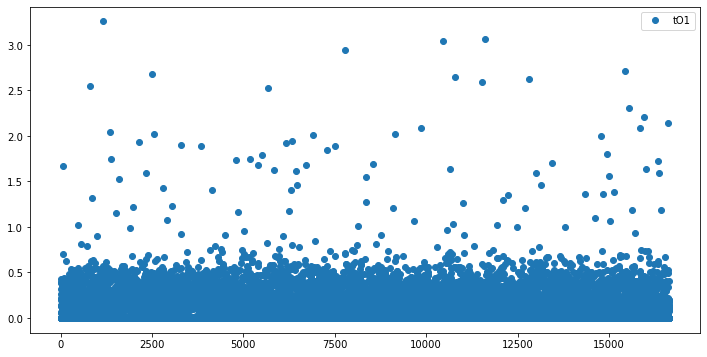

tO2
count    16656.000000
mean         0.093602
std          0.139644
min          0.000263
25%          0.001360
50%          0.032211
75%          0.138921
max          2.408420
Name: tO2, dtype: float64


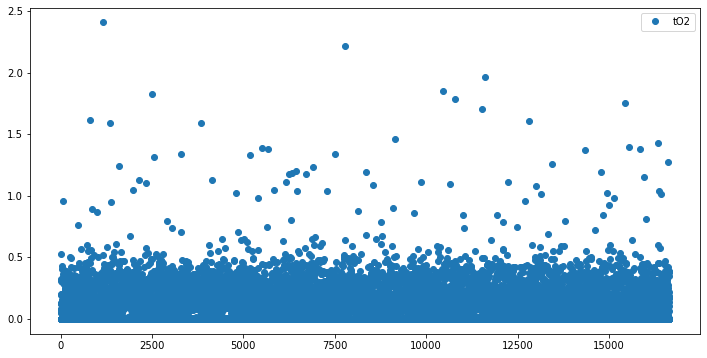

tO3
count    16656.000000
mean         0.066193
std          0.088442
min          0.000266
25%          0.001520
50%          0.022232
75%          0.100561
max          1.046640
Name: tO3, dtype: float64


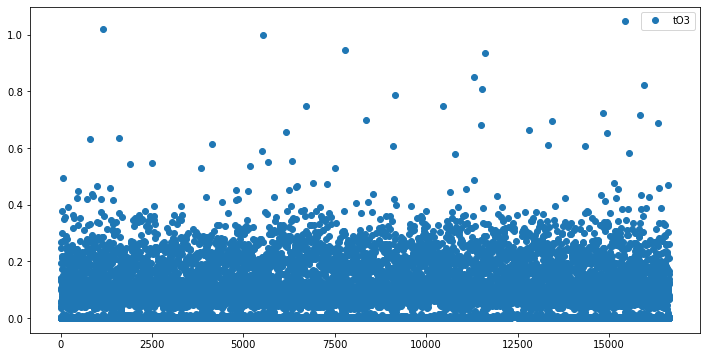

tO4
count    16656.000000
mean         0.056614
std          0.073209
min          0.000314
25%          0.001545
50%          0.017367
75%          0.086857
max          1.427574
Name: tO4, dtype: float64


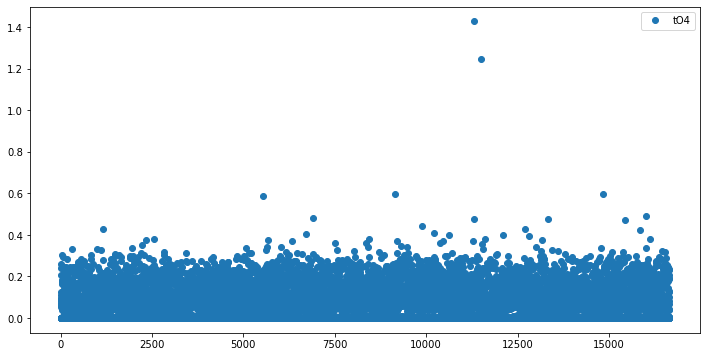

tO5
count    16656.000000
mean         0.058950
std          0.075328
min          0.000453
25%          0.001846
50%          0.022865
75%          0.087655
max          0.909653
Name: tO5, dtype: float64


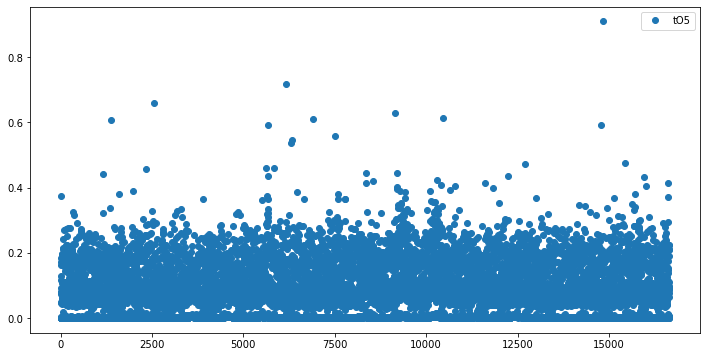

tO6
count    16656.000000
mean         0.046494
std          0.057556
min          0.000426
25%          0.001982
50%          0.021564
75%          0.070612
max          0.539919
Name: tO6, dtype: float64


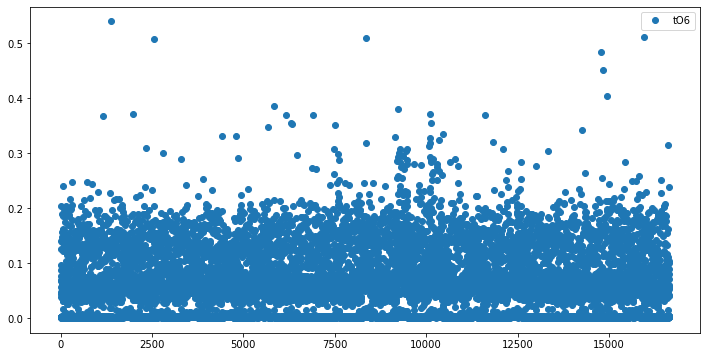

tO7
count    16656.000000
mean         0.043674
std          0.051732
min          0.000653
25%          0.002237
50%          0.023791
75%          0.064908
max          0.444306
Name: tO7, dtype: float64


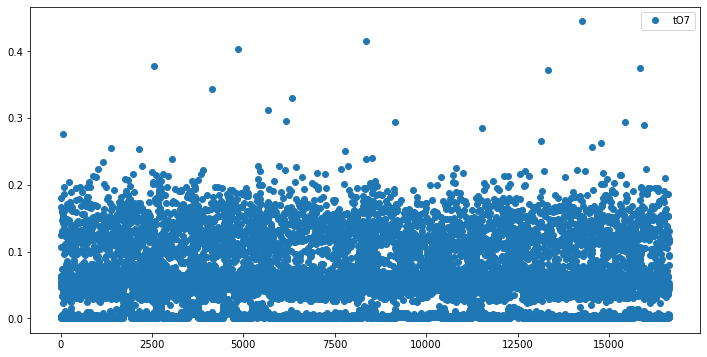

tO8
count    16656.000000
mean         0.038707
std          0.045389
min          0.000784
25%          0.002560
50%          0.023594
75%          0.056850
max          0.476133
Name: tO8, dtype: float64


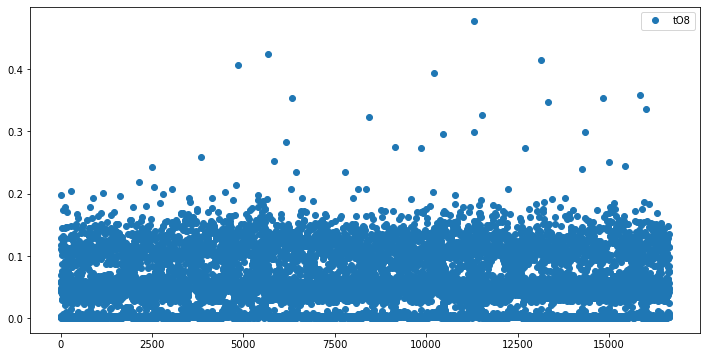

tO9
count    16656.000000
mean         0.032615
std          0.037309
min          0.000961
25%          0.002708
50%          0.018556
75%          0.048855
max          0.606961
Name: tO9, dtype: float64


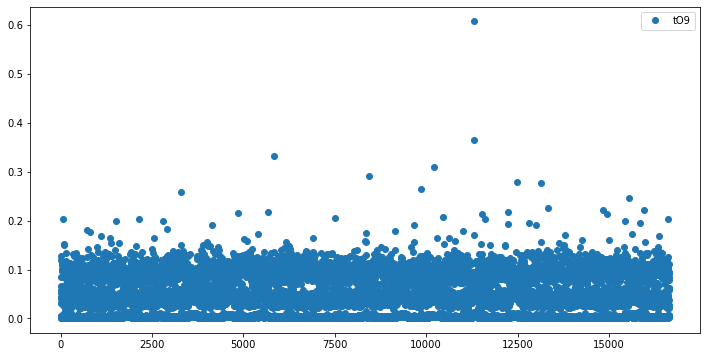

tO10
count    16656.000000
mean         0.029610
std          0.032750
min          0.001204
25%          0.003064
50%          0.019287
75%          0.043057
max          0.289376
Name: tO10, dtype: float64


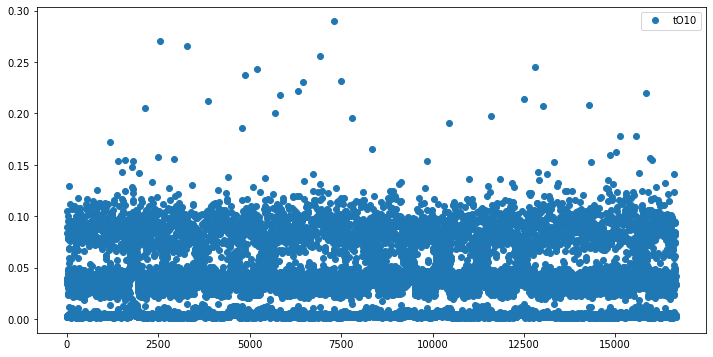

tO11
count    16656.000000
mean         0.026800
std          0.028694
min          0.001365
25%          0.003455
50%          0.017109
75%          0.038402
max          0.223936
Name: tO11, dtype: float64


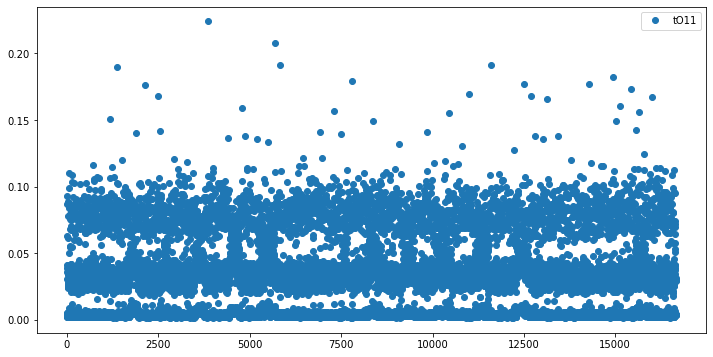

tO12
count    16656.000000
mean         0.023530
std          0.024503
min          0.001458
25%          0.003586
50%          0.016054
75%          0.032923
max          0.228248
Name: tO12, dtype: float64


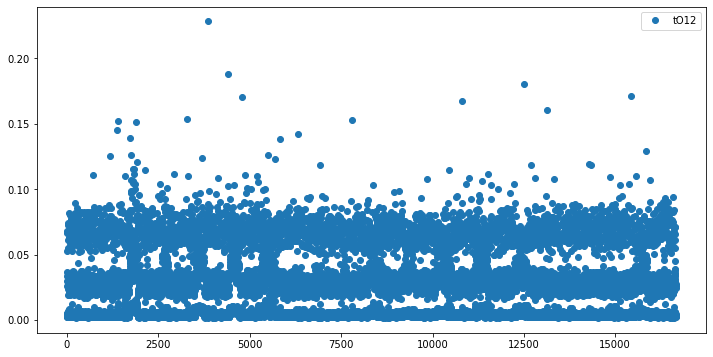

tO13
count    16656.000000
mean         0.021167
std          0.021167
min          0.001733
25%          0.003978
50%          0.015395
75%          0.028980
max          0.158997
Name: tO13, dtype: float64


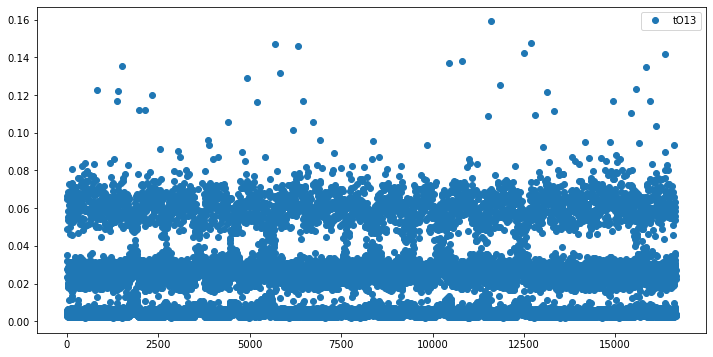

tO14
count    16656.000000
mean         0.018961
std          0.018046
min          0.001912
25%          0.004230
50%          0.014885
75%          0.025161
max          0.137563
Name: tO14, dtype: float64


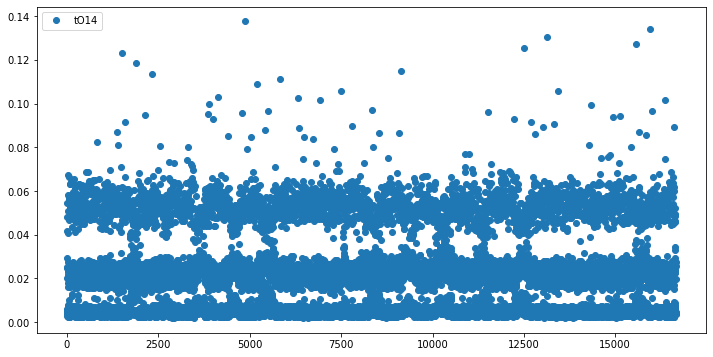

tO15
count    16656.000000
mean         0.017471
std          0.015683
min          0.002305
25%          0.004602
50%          0.014254
75%          0.022423
max          0.125222
Name: tO15, dtype: float64


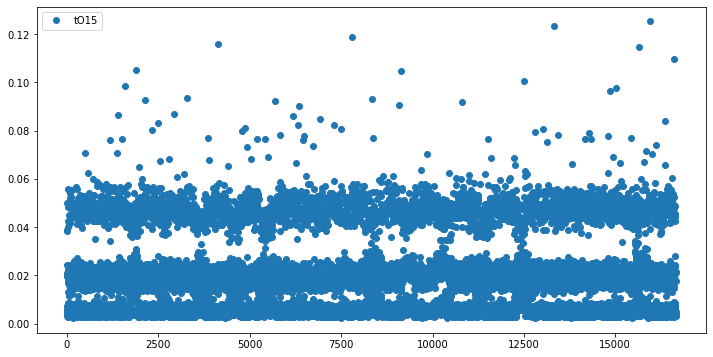

tO16
count    16656.000000
mean         0.018981
std          0.020926
min          0.002564
25%          0.004887
50%          0.013163
75%          0.020355
max          0.191239
Name: tO16, dtype: float64


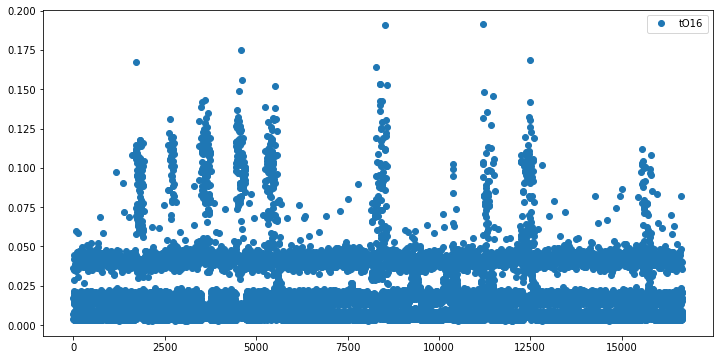

tO17
count    16656.000000
mean         0.018663
std          0.027136
min          0.003031
25%          0.005184
50%          0.012377
75%          0.018284
max          0.460084
Name: tO17, dtype: float64


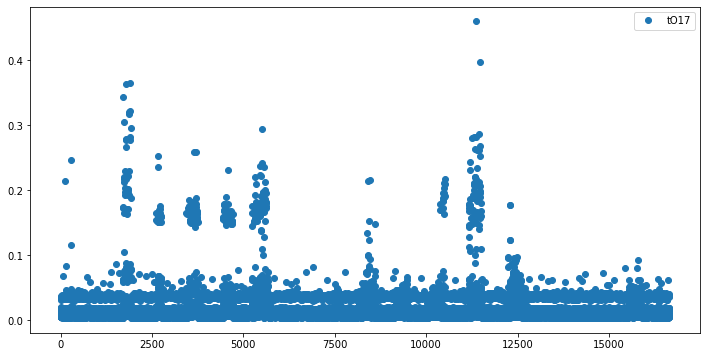

tO18
count    16656.000000
mean         0.013475
std          0.009487
min          0.003198
25%          0.005370
50%          0.011092
75%          0.015432
max          0.078653
Name: tO18, dtype: float64


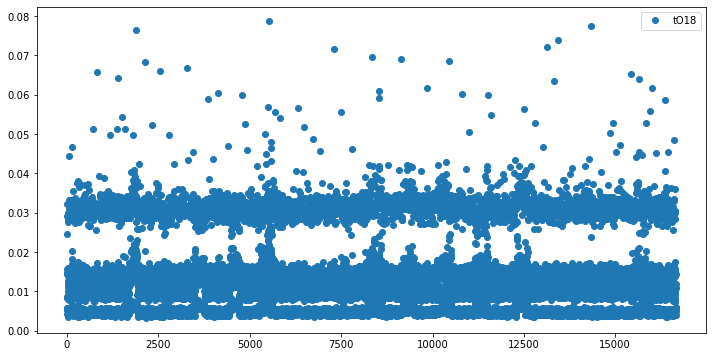

tO19
count    16656.000000
mean         0.013158
std          0.010498
min          0.003621
25%          0.005433
50%          0.010240
75%          0.013856
max          0.333069
Name: tO19, dtype: float64


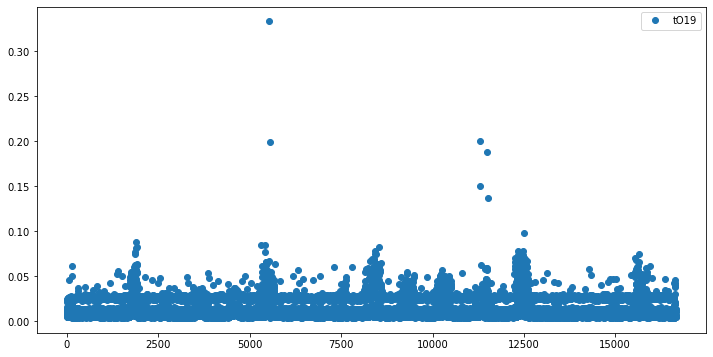

tO20
count    16656.000000
mean         0.012628
std          0.010016
min          0.003726
25%          0.005267
50%          0.010046
75%          0.014547
max          0.123197
Name: tO20, dtype: float64


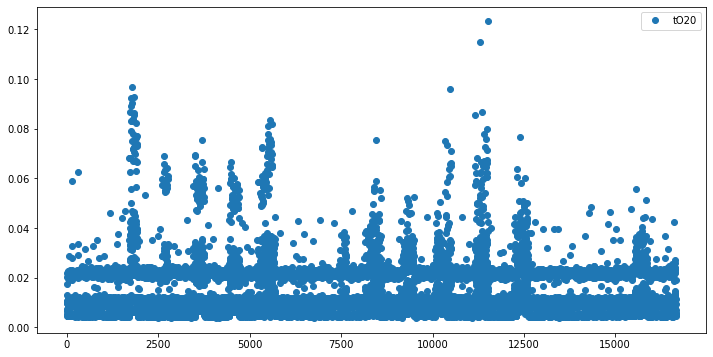

tO21
count    16656.000000
mean         0.009767
std          0.004969
min          0.003724
25%          0.004929
50%          0.009231
75%          0.011169
max          0.074286
Name: tO21, dtype: float64


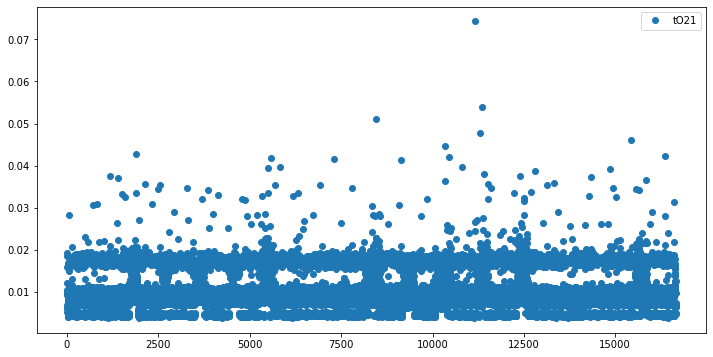

tO22
count    16656.000000
mean         0.008210
std          0.003716
min          0.003204
25%          0.004562
50%          0.007827
75%          0.010065
max          0.035440
Name: tO22, dtype: float64


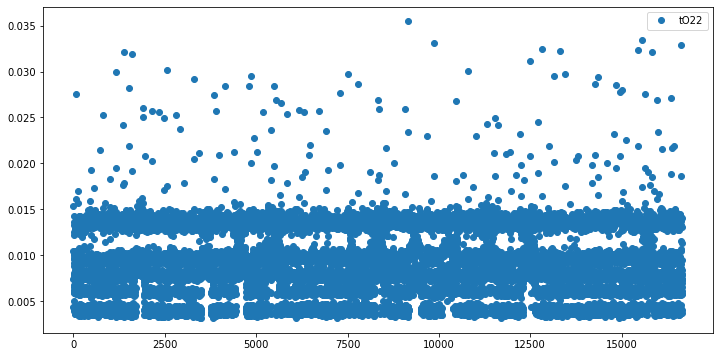

tO23
count    16656.000000
mean         0.006757
std          0.002964
min          0.002452
25%          0.003950
50%          0.006369
75%          0.008849
max          0.028264
Name: tO23, dtype: float64


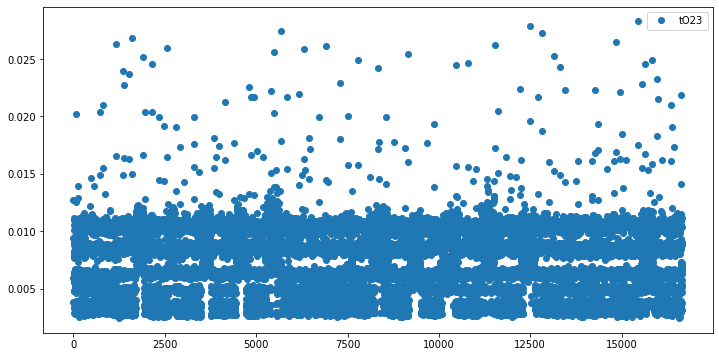

tO24
count    16656.000000
mean         0.005185
std          0.002247
min          0.001865
25%          0.003202
50%          0.004869
75%          0.006978
max          0.021491
Name: tO24, dtype: float64


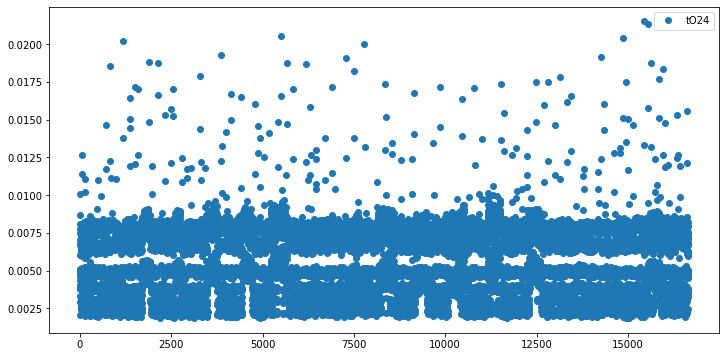

tO25
count    16656.000000
mean         0.003986
std          0.001835
min          0.001380
25%          0.002383
50%          0.003627
75%          0.005503
max          0.016871
Name: tO25, dtype: float64


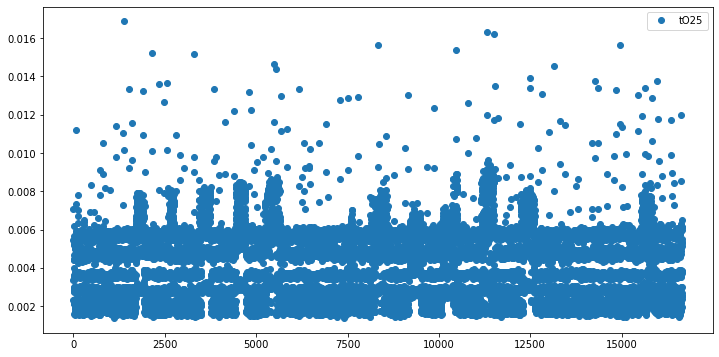

tO26
count    16656.000000
mean         0.002624
std          0.001137
min          0.000989
25%          0.001657
50%          0.002493
75%          0.003297
max          0.010441
Name: tO26, dtype: float64


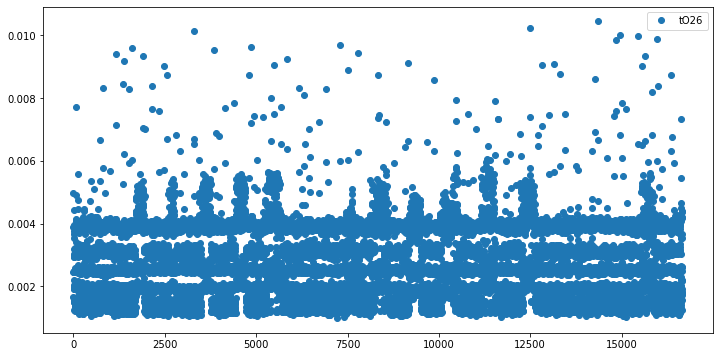

tO27
count    16656.000000
mean         0.001717
std          0.000748
min          0.000708
25%          0.001097
50%          0.001577
75%          0.002116
max          0.006462
Name: tO27, dtype: float64


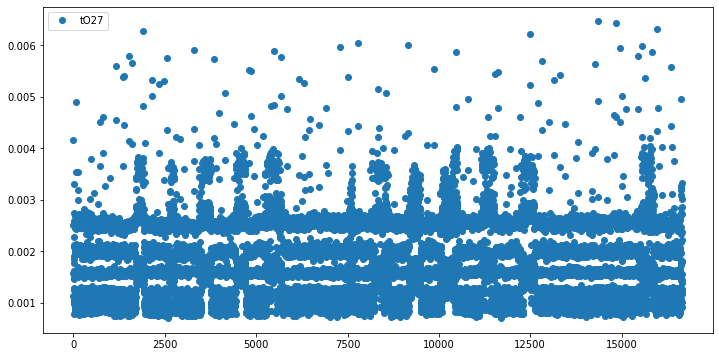

tO28
count    16656.000000
mean         0.001252
std          0.001076
min          0.000527
25%          0.000691
50%          0.000848
75%          0.001406
max          0.007726
Name: tO28, dtype: float64


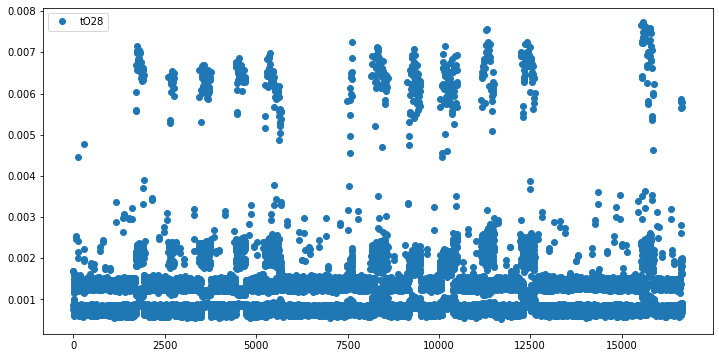

tO29
count    16656.000000
mean         0.000654
std          0.000447
min          0.000216
25%          0.000315
50%          0.000500
75%          0.000664
max          0.003141
Name: tO29, dtype: float64


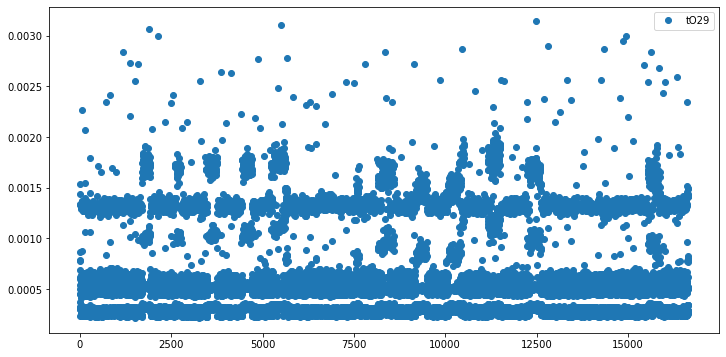

tO30
count    16656.000000
mean         0.000415
std          0.000469
min          0.000026
25%          0.000038
50%          0.000248
75%          0.000536
max          0.002856
Name: tO30, dtype: float64


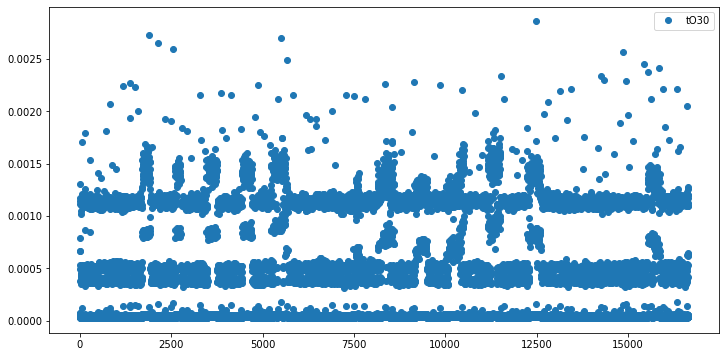

In [13]:
df2 = df2.loc[:,'tO1':'tO30']
for (column_name, column) in df2.transpose().iterrows():
    print(column_name)
    print(df2[column_name].describe())
    df2.plot(y=column_name, marker="o",linestyle='None') 
    plt.show()
    